# Midterm 2

## Problem 1




The CIFAR-100 dataset consists of 50,000 32x32 color training images and 10,000 test images, labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes.

- Images have low resolution (32x32).

- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

The dataset can be directly fetched from Keras.io Website for easy incorporation into your code.
https://keras.io/api/datasets/cifar100/


Prepare a model from the CIFAR-100 dataset using CNN+KERAS. Use 2 Convolution Layers and subsamplings before creating the Neural Model. Choose 512 neurons in the 1st layer and a dropout of 25% in the 2nd hidden layer before using 'SOFTMAX' activation function at the end to obtain the labels. Use 'RELU' in the internal layers as activation function. Use RMSProp as the optimizer and CROSS-Entropy as the loss function. Use 'Accuracy' as the metrics.

Use the 4 images provided. These images are of television,camel,wardrobe, and truck. Create a validation dataset using these images and predict the labels using the model of CIFAR-100 created by you as above.

#### Getting dataset

In [1]:
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode="coarse")

169001437/169001437 [==============================] - 13s 0us/step


In [3]:
type(y_train)

numpy.ndarray

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
y_train[0:10]

array([[11],
       [15],
       [ 4],
       [14],
       [ 1],
       [ 5],
       [18],
       [ 3],
       [10],
       [11]])

In [9]:
y_test

array([[10],
       [10],
       [ 0],
       ...,
       [ 4],
       [ 8],
       [ 2]])

In [7]:
x_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

In [8]:
x_test

array([[[[199, 215, 249],
         [196, 211, 244],
         [195, 210, 243],
         ...,
         [216, 231, 250],
         [217, 231, 250],
         [224, 234, 252]],

        [[197, 210, 239],
         [195, 208, 238],
         [195, 210, 240],
         ...,
         [231, 243, 250],
         [233, 243, 250],
         [241, 245, 253]],

        [[222, 226, 246],
         [213, 220, 242],
         [209, 219, 243],
         ...,
         [243, 250, 251],
         [244, 249, 251],
         [250, 250, 253]],

        ...,

        [[ 72,  73,  99],
         [ 71,  74, 102],
         [ 74,  78, 108],
         ...,
         [220, 208, 217],
         [183, 168, 181],
         [155, 141, 150]],

        [[ 72,  75, 104],
         [ 76,  81, 111],
         [ 84,  89, 122],
         ...,
         [222, 212, 220],
         [187, 174, 192],
         [145, 132, 149]],

        [[ 80,  85, 118],
         [ 84,  90, 123],
         [ 85,  92, 127],
         ...,
         [217, 207, 215],
        

#### Transforming x and y

In [10]:
x_train = x_train.astype('float32') # to change the ints to floats.
x_train /= 255 # to standardize the values between 0 and 255 into 0 to 1.
x_train[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.7647059 , 0.8039216 , 0.75686276],
        [0.83137256, 0.8784314 , 0.8       ],
        [0.7137255 , 0.7607843 , 0.654902  ]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.6666667 , 0.6901961 , 0.5882353 ],
        [0.6313726 , 0.65882355, 0.50980395],
        [0.57254905, 0.6039216 , 0.44313726]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.7411765 , 0.78039217, 0.6627451 ],
        [0.6509804 , 0.69803923, 0.50980395],
        [0.4745098 , 0.52156866, 0.34117648]],

       ...,

       [[0.5803922 , 0.7254902 , 0.30980393],
        [0.5568628 , 0.7137255 , 0.22352941],
        [0.54901963, 0

In [11]:
x_test = x_test.astype('float32') # to change ints to floats.
x_test /= 255 # to standardize the values between 0 and 255 into 0 to 1.
x_test[0]

array([[[0.78039217, 0.84313726, 0.9764706 ],
        [0.76862746, 0.827451  , 0.95686275],
        [0.7647059 , 0.8235294 , 0.9529412 ],
        ...,
        [0.84705883, 0.90588236, 0.98039216],
        [0.8509804 , 0.90588236, 0.98039216],
        [0.8784314 , 0.91764706, 0.9882353 ]],

       [[0.77254903, 0.8235294 , 0.9372549 ],
        [0.7647059 , 0.8156863 , 0.93333334],
        [0.7647059 , 0.8235294 , 0.9411765 ],
        ...,
        [0.90588236, 0.9529412 , 0.98039216],
        [0.9137255 , 0.9529412 , 0.98039216],
        [0.94509804, 0.9607843 , 0.99215686]],

       [[0.87058824, 0.8862745 , 0.9647059 ],
        [0.8352941 , 0.8627451 , 0.9490196 ],
        [0.81960785, 0.85882354, 0.9529412 ],
        ...,
        [0.9529412 , 0.98039216, 0.9843137 ],
        [0.95686275, 0.9764706 , 0.9843137 ],
        [0.98039216, 0.98039216, 0.99215686]],

       ...,

       [[0.28235295, 0.28627452, 0.3882353 ],
        [0.2784314 , 0.2901961 , 0.4       ],
        [0.2901961 , 0

In [12]:
y_train = keras.utils.to_categorical(y_train, 20)
y_train.shape

(50000, 20)

In [13]:
y_test = keras.utils.to_categorical(y_test, 20)
y_test.shape

(10000, 20)

#### Check
We visualizing the images to make sure our work has been correct thus far.

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


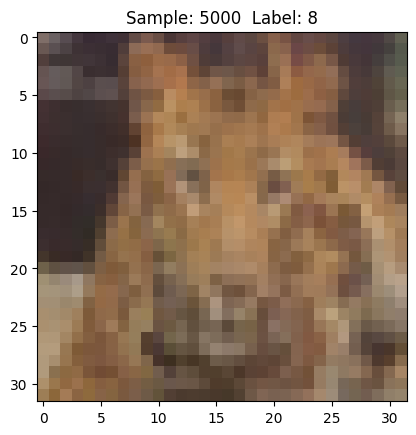

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

def display_sample(num):
    print(y_train[num])  # Print the categorical-array of this sample's label
    label = y_train[num].argmax(axis=0) # Get the label converted back to a number
    image = x_train[num] # setting what the image
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap())
    plt.show()

display_sample(5000)

#### Creating Neural Network

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten # for model with CNN.

Prepare a model from the CIFAR-100 dataset using CNN+KERAS.


* Use 2 Convolution Layers and subsamplings before creating the Neural Model.
* Choose 512 neurons in the 1st layer and a dropout of 25% in the 2nd hidden layer before using 'SOFTMAX' activation function at the end to obtain the labels.
* Use 'RELU' in the internal layers as activation function.
* Use RMSProp as the optimizer and CROSS-Entropy as the loss function.
* Use 'Accuracy' as the metrics.

In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))) # 32 3x3 kernels
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 64 3x3 kernels
model.add(MaxPooling2D(pool_size=(2, 2))) # Reduce by taking the max of each 2x2 block

model.add(Flatten()) # Flatten the results to one dimension for passing into our first layer

model.add(Dense(512, activation='relu')) # A hidden layer to learn with
model.add(Dropout(0.25)) # Dropout to avoid overfitting

model.add(Dense(128, activation='relu')) # A hidden layer to learn with
model.add(Dropout(0.25)) # Dropout to avoid overfitting

model.add(Dense(20, activation='softmax')) # Final categorization from 0-19 with softmax

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 512)               6423040   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

In [3]:
from tensorflow.keras.optimizers import RMSprop

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

#### Training the model

In [20]:
history = model.fit(x_train, y_train,
                    batch_size=50,
                    epochs=10,
                    verbose=2,
                    validation_data=(x_test, y_test))

Epoch 1/10
1000/1000 - 17s - loss: 2.3925 - accuracy: 0.2680 - val_loss: 2.0434 - val_accuracy: 0.3687 - 17s/epoch - 17ms/step
Epoch 2/10
1000/1000 - 5s - loss: 1.9201 - accuracy: 0.4089 - val_loss: 1.8158 - val_accuracy: 0.4389 - 5s/epoch - 5ms/step
Epoch 3/10
1000/1000 - 6s - loss: 1.6508 - accuracy: 0.4903 - val_loss: 1.6737 - val_accuracy: 0.4943 - 6s/epoch - 6ms/step
Epoch 4/10
1000/1000 - 5s - loss: 1.4067 - accuracy: 0.5597 - val_loss: 1.6551 - val_accuracy: 0.4997 - 5s/epoch - 5ms/step
Epoch 5/10
1000/1000 - 5s - loss: 1.1743 - accuracy: 0.6350 - val_loss: 1.7276 - val_accuracy: 0.5072 - 5s/epoch - 5ms/step
Epoch 6/10
1000/1000 - 5s - loss: 0.9600 - accuracy: 0.7002 - val_loss: 1.7586 - val_accuracy: 0.5081 - 5s/epoch - 5ms/step
Epoch 7/10
1000/1000 - 5s - loss: 0.7814 - accuracy: 0.7565 - val_loss: 1.9114 - val_accuracy: 0.5116 - 5s/epoch - 5ms/step
Epoch 8/10
1000/1000 - 5s - loss: 0.6328 - accuracy: 0.8011 - val_loss: 2.0428 - val_accuracy: 0.5133 - 5s/epoch - 5ms/step
Epoch

#### Testing the model's results

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.145683526992798
Test accuracy: 0.5077000260353088


#### Validating model with our own images.

In [4]:
import tensorflow as tf
import numpy as np

In [23]:
img1 = tf.keras.utils.load_img("camel.jpg", target_size=(32, 32))
img1_arr = tf.keras.utils.img_to_array(img1)
img1_arr.shape

(32, 32, 3)

In [24]:
img2 = tf.keras.utils.load_img("television.jpg", target_size=(32, 32))
img2_arr = tf.keras.utils.img_to_array(img2)
img2_arr.shape

(32, 32, 3)

In [25]:
img3 = tf.keras.utils.load_img("truck.jpg", target_size=(32, 32))
img3_arr = tf.keras.utils.img_to_array(img3)
img3_arr.shape

(32, 32, 3)

In [26]:
img4 = tf.keras.utils.load_img("wardrobe.jpg", target_size=(32, 32))
img4_arr = tf.keras.utils.img_to_array(img4)
img4_arr.shape

(32, 32, 3)

In [27]:
val_set = np.array([img1_arr, img2_arr, img3_arr, img4_arr])
val_set.shape

(4, 32, 32, 3)

In [28]:
val_set = val_set.astype('float32') # to change ints to floats.
val_set /= 255 # to standardize the values between 0 and 255 into 0 to 1.
val_set[0]

array([[[0.9098039 , 0.9098039 , 0.9019608 ],
        [0.9098039 , 0.9098039 , 0.9019608 ],
        [0.90588236, 0.90588236, 0.8980392 ],
        ...,
        [0.88235295, 0.8862745 , 0.8666667 ],
        [0.8745098 , 0.8784314 , 0.85882354],
        [0.8745098 , 0.8784314 , 0.85882354]],

       [[0.90588236, 0.90588236, 0.8980392 ],
        [0.9019608 , 0.9019608 , 0.89411765],
        [0.8509804 , 0.8509804 , 0.81960785],
        ...,
        [0.8666667 , 0.87058824, 0.8509804 ],
        [0.8666667 , 0.87058824, 0.8509804 ],
        [0.8627451 , 0.8666667 , 0.84705883]],

       [[0.90588236, 0.90588236, 0.8980392 ],
        [0.89411765, 0.89411765, 0.8862745 ],
        [0.6509804 , 0.49411765, 0.3529412 ],
        ...,
        [0.8627451 , 0.8666667 , 0.84705883],
        [0.85882354, 0.8627451 , 0.84313726],
        [0.85882354, 0.8627451 , 0.84313726]],

       ...,

       [[0.6784314 , 0.5411765 , 0.39215687],
        [0.72156864, 0.5647059 , 0.42352942],
        [0.7137255 , 0

In [29]:
# Run the image through the deep neural network to make a prediction
predictions = model.predict(val_set)

1/1 [==============================] - 0s 171ms/step


In [30]:
predictions

array([[5.56436535e-05, 3.33532043e-05, 1.10002147e-04, 1.60093931e-03,
        6.74154027e-04, 4.11002152e-03, 2.76330393e-03, 1.02051219e-03,
        9.29293811e-01, 1.81884703e-03, 2.66030873e-03, 2.61547901e-02,
        5.97590464e-04, 5.80087630e-03, 8.51074656e-05, 1.20199472e-02,
        1.09062251e-02, 1.10935449e-04, 1.22724115e-04, 6.09602066e-05],
       [5.66044933e-10, 9.22151244e-09, 5.15230454e-07, 2.06832993e-07,
        1.26256564e-04, 1.10683231e-05, 6.59324796e-05, 1.63012664e-05,
        9.84663010e-01, 3.54187687e-05, 1.85693405e-03, 3.70425223e-05,
        4.15073964e-06, 3.25450201e-05, 3.42529782e-09, 1.20246792e-02,
        2.41713246e-06, 9.64635285e-04, 5.89479350e-05, 9.99717013e-05],
       [2.97355700e-06, 5.71052787e-08, 9.52915347e-09, 1.96975236e-08,
        1.98924099e-09, 1.68743398e-07, 9.11674306e-06, 1.27934038e-06,
        6.82424870e-05, 2.07286852e-04, 9.33825067e-05, 1.07874372e-03,
        3.10909343e-07, 7.75653888e-08, 1.07432435e-07, 5.4073

[5.5643653e-05 3.3353204e-05 1.1000215e-04 1.6009393e-03 6.7415403e-04
 4.1100215e-03 2.7633039e-03 1.0205122e-03 9.2929381e-01 1.8188470e-03
 2.6603087e-03 2.6154790e-02 5.9759046e-04 5.8008763e-03 8.5107466e-05
 1.2019947e-02 1.0906225e-02 1.1093545e-04 1.2272412e-04 6.0960207e-05]


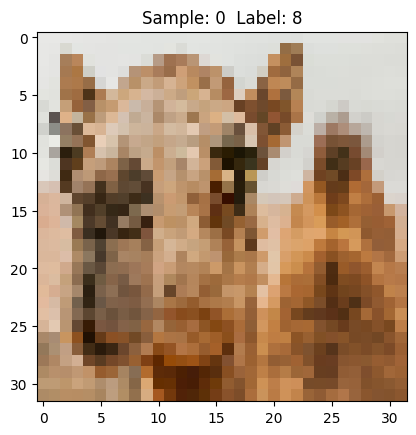

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

def display_sample_2(num):
    print(predictions[num])  # Print the categorical-array of this sample's label
    label = predictions[num].argmax(axis=0) # Get the label converted back to a number
    image = val_set[num] # setting what the image
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap())
    plt.show()

display_sample_2(0) # change value from 0 to 3.

# display_sample_2(0): The camel. I get label = 11 (large_omnivores_and_herbivores), which is correct.
# display_sample_2(1): The TV. I get label = 19 (vehicles_2), which is incorrect.
# display_sample_2(2): The truck. I get label = 19 (vehicles_2), which is most likely correct.
# display_sample_2(3): The wardrobe. I get label = 19 (vehicles_2), which is incorrect.

## Problem 2

Perform Text Classification on the tweet data about COVID19. The tweets have been pulled from Twitter and manual tagging has been done then.

1. Properly remove punctuations, stopwords and any words of length 1 or 2.
2. Get a wordcloud.
3. Change number of Topics to 20 in the Gensim LDAMulticore and draw the visualisation.
4. Write a complete code using TF-IDF along with Random Forest Classifier to build a Tweet Sentiment classification Model.Use your own discretion to determine the relevant hyperparameters and model parameters. Make sure to provide justification while dropping a column. Remember this is a multiclass classification problem. Give the relevant precision and recall for the model.


Columns:
1. Location
2. Tweet At
3. Original Tweet
4. Sentiment (To be predicted)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

#### Getting dataset

1. Use the original Tweet File instead of my sample spam.csv file for your work. [2 Marks]

In [6]:
df = pd.read_csv("Corona_NLP.csv", encoding = 'latin-1')

In [7]:
df = df.drop(labels = ['UserName', 'ScreenName'], axis = 1)

In [8]:
df

,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...
41152,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


#### Removingshort words, punctuation, and stopwords.

2. Properly remove punctuations, stopwords and any words of length 1 or 2. [3 Marks]

In [9]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
import string
import re

In [10]:
nltk.download('all')
stopwords = stopwords.words('english')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [11]:
example = "Hello! I'd like to write a simple yet complete sentence so I can test a function; This function would strip a sentence from all stopwords and punctuation :)"

In [12]:
def clean_text(text):
    # removing words of length < 3
    text = text.split()
    text = [word for word in text if len(word) > 2]
    text = ' '.join(text)

    # removing punctuation
    text = "".join([word.lower() for word in text if word not in string.punctuation])

    # removing stopwords
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]

    # converting the list of words into text
    text = ' '.join(text)

    return text

In [13]:
clean_text(example)

'hello id like write simple yet complete sentence test function function would strip sentence stopwords punctuation'

In [14]:
df['clean_text'] = df['OriginalTweet'].map(clean_text)
df

,Location,TweetAt,OriginalTweet,Sentiment,clean_text
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie philgahan chrisitv httpstcoifz9fan2pa...
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket covid19 outbreak im paranoid...
...,...,...,...,...,...
41152,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering stock supermarket shel...
41153,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,response complaint provided citing covid19 rel...
41154,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,know itâ getting tough kameronwilds rationing ...
41155,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong smell hand sanitizer starting turn coron...


#### WordCloud


In [15]:
from wordcloud import WordCloud

In [16]:
wc = WordCloud(
    background_color='black',
    max_words = 100,
    max_font_size=110
    )

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

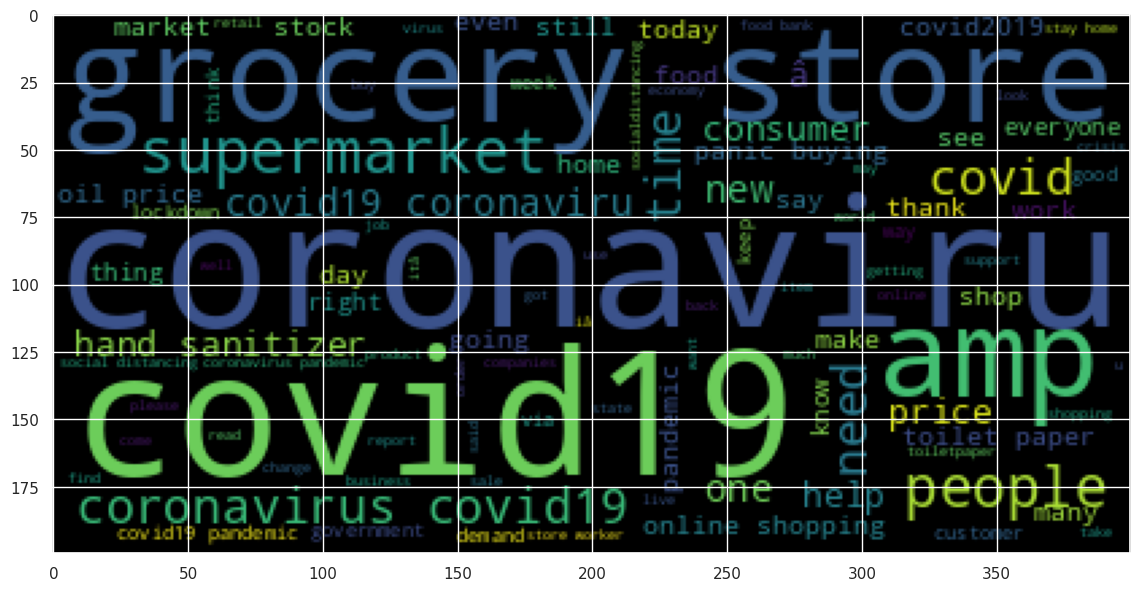

In [18]:
wc.generate(' '.join(df['clean_text']))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

#### Gensim LDAMulticore

4. Change number of Topics to 20 in the Gensim LDAMulticore and draw the visualisation.

In [19]:
import gensim
from gensim import corpora, models

In [20]:
twitts = df['clean_text'].tolist() # getting a list of all the twitts

In [21]:
texts = [ [word for word in twitt.split()] for twitt in twitts] # transforming each twitt to a list of words

In [22]:
dictionary = corpora.Dictionary(texts) # creating our dictionary

In [23]:
corpus = [dictionary.doc2bow(text) for text in texts] # creating our corpus

In [24]:
tfidf = models.TfidfModel(corpus)

corpus_tfidf = tfidf[corpus]

In [25]:
lda_model = gensim.models.LdaMulticore(corpus_tfidf,
                                       num_topics=20,
                                       id2word = dictionary,
                                       passes = 2,
                                       workers=2)

In [26]:
#explore the words occuring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.002*"spray" + 0.002*"booming" + 0.002*"skyrocket" + 0.002*"postcovid19" + 0.002*"nations" + 0.001*"treating" + 0.001*"bidding" + 0.001*"cbc" + 0.001*"foodbanks" + 0.001*"fined"


Topic: 1 
Words: 0.004*"covid19pandemic" + 0.002*"spike" + 0.002*"tenants" + 0.002*"jump" + 0.002*"pennsylvania" + 0.002*"uptick" + 0.002*"reusable" + 0.001*"garden" + 0.001*"communications" + 0.001*"ministry"


Topic: 2 
Words: 0.006*"sanitizer" + 0.005*"hand" + 0.004*"soap" + 0.003*"hands" + 0.003*"handsanitizer" + 0.002*"coronavirus" + 0.002*"washing" + 0.002*"distillery" + 0.002*"dies" + 0.002*"sanitize"


Topic: 3 
Words: 0.002*"metres" + 0.002*"laundry" + 0.002*"lysol" + 0.002*"maryland" + 0.002*"lessons" + 0.002*"soaring" + 0.002*"granted" + 0.002*"foodbank" + 0.002*"fix" + 0.001*"excellent"


Topic: 4 
Words: 0.009*"workers" + 0.005*"supermarket" + 0.005*"thank" + 0.004*"drivers" + 0.004*"grocery" + 0.004*"staff" + 0.004*"store" + 0.003*"coronavirus" + 0.003*"covid19" + 0.003*"nurses

In [27]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus_tfidf, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.277208  0.020807       1        1  27.458393
6      0.201518  0.025110       2        1  13.886448
9      0.135817 -0.106352       3        1   8.693172
13     0.111796  0.028410       4        1   5.832415
8      0.101983 -0.002681       5        1   5.518052
4      0.078543  0.095915       6        1   5.209656
5      0.014050 -0.097380       7        1   4.023436
14     0.001708 -0.052022       8        1   3.432460
2     -0.017186  0.024655       9        1   2.841040
17    -0.044650  0.007081      10        1   2.372053
16    -0.060223 -0.000036      11        1   2.276299
10    -0.071842  0.014785      12        1   2.225285
1     -0.081160 -0.001501      13        1   2.133039
18    -0.073963  0.019814      14        1   2.107102
0     -0.093501  0.007716      15        1   2.083066
7     -0.102633 -0.009997      16        1   2.041445
12    -0.087592 -0.003508      17        1   2.008346
19    -0.091071  0.009347      18        1   1.986621
3     -0.096311  0.008637      19        1   1.977387
15    -0.102491  0.011198      20        1   1.894285, topic_info=            Term        Freq       Total Category  logprob  loglift
217     consumer  358.000000  358.000000  Default  30.0000  30.0000
644      workers  267.000000  267.000000  Default  29.0000  29.0000
1824         oil  203.000000  203.000000  Default  28.0000  28.0000
91     sanitizer  315.000000  315.000000  Default  27.0000  27.0000
82          hand  268.000000  268.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
8700      church    4.095829   10.701753  Topic20  -6.5776   3.0059
19271      crore    2.568691    3.847708  Topic20  -7.0442   3.5622
4213    training    2.913147    6.212479  Topic20  -6.9184   3.2090
5238       party    2.823657    5.986142  Topic20  -6.9496   3.2149
3491       sweep    2.790725   13.957496  Topic20  -6.9613   2.3566

[1244 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
11783     17  0.687214   10k
12886     13  0.924358   130
3388       7  0.886952    14
14769      3  0.960052  2008
4706       8  0.866227  2018
...      ...       ...   ...
270       14  0.005730     â
270       15  0.011459     â
270       17  0.005730     â
270       18  0.005730     â
270       19  0.005730     â

[3062 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 7, 10, 14, 9, 5, 6, 15, 3, 18, 17, 11, 2, 19, 1, 8, 13, 20, 4, 16])

#### Classifying Model

5. Write a complete code using TF-IDF along with Random Forest Classifier to build a Tweet Sentiment classification Model.

Before we start with the TF-IDF/RandomForest classifier, let's explore our data to see if a column can be dropped.

In [57]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sentiment,clean_text
35739,Extremely Positive,found exports masks amp went 1000 dec jan hand...
10062,Negative,social distancing without announcement lock mi...
22849,Extremely Negative,period fear panic buying buying fake hand sani...
33305,Neutral,httpstcozih30eb4lc interview melissa bondy phd...
11272,Extremely Positive,consider situations eggs stock supermarket lik...
...,...,...
21843,Positive,take necessary steps maintain wellbeing commun...
39890,Extremely Positive,whether work essential job simply hit grocery ...
24934,Negative,ghmc mobile auto selling vegetables rythu baza...
13235,Extremely Negative,apparently taken refuse collectors show happen...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       32567 non-null  object
 1   TweetAt        41157 non-null  object
 2   OriginalTweet  41157 non-null  object
 3   Sentiment      41157 non-null  object
 4   clean_text     41157 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
df.Location

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                              London
1                                  UK
2                           Vagabonds
3                                 NaN
4                                 NaN
                     ...             
41152    Wellington City, New Zealand
41153                             NaN
41154                             NaN
41155                             NaN
41156    i love you so much || he/him
Name: Location, Length: 41157, dtype: object

In [32]:
df.Location.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8590

In [33]:
df.Location.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [34]:
df.Location.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Location
London                         540
United States                  528
London, England                520
New York, NY                   395
Washington, DC                 373
                              ... 
Greater Accra, Ghana             1
Thane                            1
Pasig City                       1
Amethi Uttar Pradesh             1
brisbane Qld and Udon Thani      1
Name: count, Length: 12220, dtype: int64

In [35]:
sns.countplot(x='Location', data=df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Location', ylabel='count'>

Error in callback <function _draw_all_if_interactive at 0x7fe1c5919f30> (for post_execute):


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 156 (\x9c) missing from current font.
  func(*args, **kwargs)


ValueError: ignored

ValueError: ignored

<Figure size 640x480 with 1 Axes>

In [36]:
df.TweetAt.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [37]:
df.TweetAt.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [38]:
df.TweetAt.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TweetAt
20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='TweetAt', ylabel='count'>

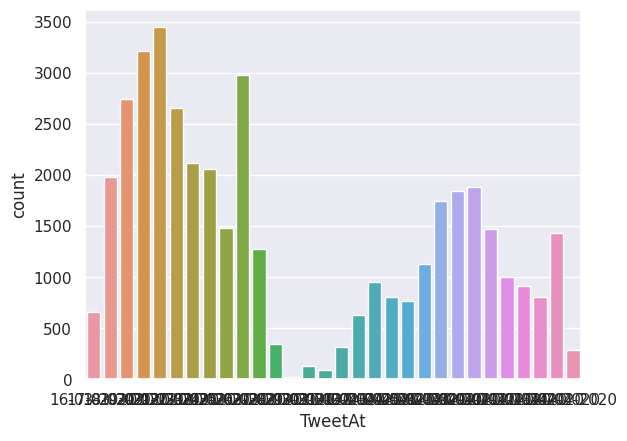

In [39]:
sns.countplot(x='TweetAt', data=df)

In [40]:
df.Sentiment.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

##### Dropping Location, TweetAt, and OriginalTweet.

* The 'Location' variable has several NA values and some other values that are not locations at all. Additionally, the format is inconsistent. Furthermore, knowing the location does not contribute to sentiment analysis, therefore, the colum will be dropped.

* In the case of the tweett's time ('TweetAt'), the column has complete values and consistent formatting. However, knowing the time is not helpful to predict the sentiment of the twitt. Therefore, we'll also drop this variable.

* Finally, we will drop the 'OriginalTweet' column as we have cleaned the text and added to another column.

In [41]:
df = df.drop(labels = ["Location", "TweetAt", "OriginalTweet"], axis = 1)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sentiment,clean_text
0,Neutral,menyrbie philgahan chrisitv httpstcoifz9fan2pa...
1,Positive,advice talk neighbours family exchange phone n...
2,Positive,coronavirus australia woolworths give elderly ...
3,Positive,food stock one empty please dont panic enough ...
4,Extremely Negative,ready supermarket covid19 outbreak im paranoid...
...,...,...
41152,Neutral,airline pilots offering stock supermarket shel...
41153,Extremely Negative,response complaint provided citing covid19 rel...
41154,Positive,know itâ getting tough kameronwilds rationing ...
41155,Neutral,wrong smell hand sanitizer starting turn coron...


##### Vectorizing the tweets.

We will work with 20% of the dataframe to avoid running out of RAM.

In [42]:
df = df.sample(frac=0.20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sentiment,clean_text
35739,Extremely Positive,found exports masks amp went 1000 dec jan hand...
10062,Negative,social distancing without announcement lock mi...
22849,Extremely Negative,period fear panic buying buying fake hand sani...
33305,Neutral,httpstcozih30eb4lc interview melissa bondy phd...
11272,Extremely Positive,consider situations eggs stock supermarket lik...
...,...,...
21843,Positive,take necessary steps maintain wellbeing commun...
39890,Extremely Positive,whether work essential job simply hit grocery ...
24934,Negative,ghmc mobile auto selling vegetables rythu baza...
13235,Extremely Negative,apparently taken refuse collectors show happen...


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
tfidf_vect = TfidfVectorizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
X_tfidf = tfidf_vect.fit_transform(df['clean_text']) # we vectorize the sentences from our DF.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
X = pd.DataFrame(X_tfidf.toarray()) # we visualize our vectorized DF
X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,27318,27319,27320,27321,27322,27323,27324,27325,27326,27327
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Splitting into train and test.

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# defining possible parameters for RFC.
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

param = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3],
    'min_samples_split':[2, 4, 6]
    }

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### *K*-fold validation & gridsearch

In [50]:
# Preparing to do 5-Fold Cross Validation.
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=3, n_repeats=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
# Looking for the optimal model with 5-Fold Cross Validation and GridSearch.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# defining search
search_ridge = GridSearchCV(RandomForestClassifier(), param, n_jobs=-1, cv=cv)
# execute search
result = search_ridge.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]})

##### Fitting model and measuring accuracy

In [53]:
# Fit a basic Random Forest model
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
# Make predictions on the test set using the fit model
y_pred = rf_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# Import the methods that will be needed to evaluate a basic model
from sklearn.metrics import classification_report

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
# Evalute model predictions using precision and recall
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

Extremely Negative       0.57      0.33      0.42       311
Extremely Positive       0.59      0.29      0.39       422
          Negative       0.43      0.40      0.42       617
           Neutral       0.47      0.66      0.55       453
          Positive       0.38      0.50      0.43       667

          accuracy                           0.45      2470
         macro avg       0.49      0.44      0.44      2470
      weighted avg       0.47      0.45      0.44      2470



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
